In [1]:
from matplotlib import(
    pyplot as plt,
    image as mpim,
)
import cv2 as cv
import numpy as np

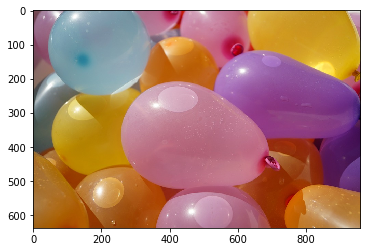

In [3]:
img = cv.imread('images/water_balloons.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

## Display RGB channels

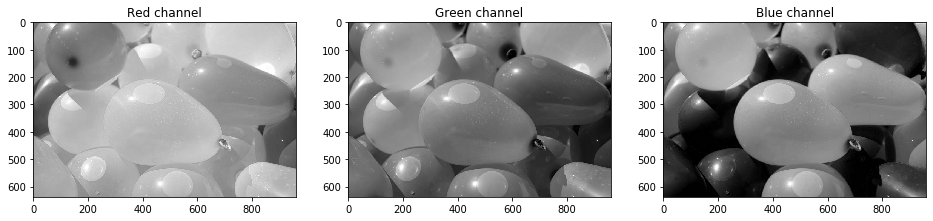

In [6]:
_, axi = plt.subplots(1, 3, figsize=(16, 8))
labels = ['Red', 'Green', 'Blue']
for i, ax in enumerate(axi.flat):
    channel = img[:,:,i]
    ax.imshow(channel, cmap='gray')
    ax.set_title(f'{labels[i]} channel')
plt.show()

## Display HSV channels

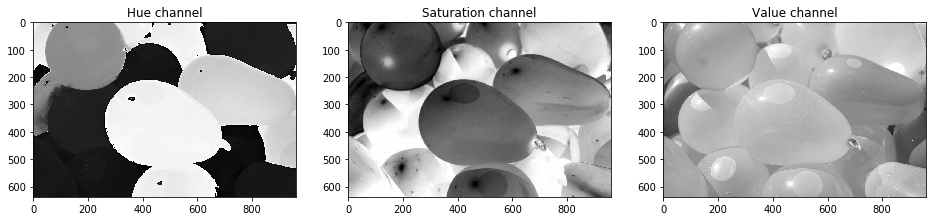

In [8]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

_, axi = plt.subplots(1, 3, figsize=(16, 8))
labels = ['Hue', 'Saturation', 'Value']

for i, ax in enumerate(axi.flat):
    channel = img_hsv[:,:,i]
    ax.imshow(channel, cmap='gray')
    ax.set_title(f'{labels[i]} channel')
plt.show()

## How to find HSV values to track?

It is very simple and you can use the same function, `cv.cvtColor()`. Instead of passing an image, you just pass the BGR values you want. For example, to find the HSV value of Green, try following commands

In [12]:
green = np.uint8([0, 255, 0]).reshape((1, 1, 3))
hsv_green = cv.cvtColor(green, cv.COLOR_BGR2HSV)
print(hsv_green.reshape((3,)))

[ 60 255 255]


Now you take `[H - 10, 100, 100]` and `[H + 10, 255, 255]` as lower bound and upper bound respectively. Apart from this method, you can use any image editing tools like GIMP or any online converters to find these values, but don't forget to adjust the HSV ranges.

### Additional Resources
1. OpenCV - [Changing Colorspaces](https://docs.opencv.org/trunk/df/d9d/tutorial_py_colorspaces.html)

## Filter pink objects

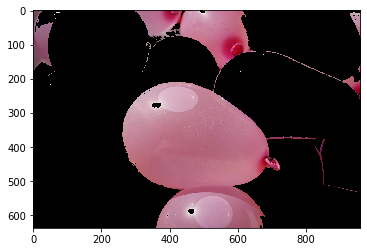

In [25]:
# define color selection criteria in HSV values
lower_hue = np.array([160, 0, 100]) 
upper_hue = np.array([180, 255, 255])

# define the masked area in HSV space
mask_hsv = cv.inRange(img_hsv, lower_hue, upper_hue)

# mask image
masked_image = cv.bitwise_and(img, img, mask=mask_hsv)

# alternative way of masking
#masked_image = np.copy(img)
#masked_image[mask_hsv == 0] = [0, 0, 0]

# vizualize the masked image
plt.imshow(masked_image)
plt.show()